<font size="6"><b>Project Demo</b></font>

<font size="5">CSCI 4850-5850 - Neural Networks</font>

<font size="4">Due: May 2 @ 9:30am</font>

<font size="6">Inverse Nutrition Mapping - Bread Recipes</font>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import csv
import sympy as sp
sp.init_printing(use_latex=True)

np.set_printoptions(suppress = True)

from src import *

from IPython.display import Image

#### Load Model & Load Normalizer Function

In [2]:
def load(folderpath, modelpath):
    
    recipe_max_path = f"{folderpath}/norm_recipe_max"
    recipe_min_path = f"{folderpath}/norm_recipe_min"
    
    quant_max_path = f"{folderpath}/norm_quant_max"
    quant_min_path = f"{folderpath}/norm_quant_min"
    
    model = keras.models.load_model(f'{folderpath}/{modelpath}.h5')
    
    recipe_normalizer = Normalizer()
    recipe_normalizer.load(recipe_max_path, recipe_min_path)
    
    quant_normalizer = Normalizer()
    quant_normalizer.load(quant_max_path, quant_min_path)
    

    
    return model, recipe_normalizer, quant_normalizer

<font size="5">All Parameters</font>

### Model to Load

In [3]:
# For Generator
rank = True

train_examples = 10000
test_examples = 100

# For Model
embed_dim = 1024 
stack = 6 
optimizer = keras.optimizers.Nadam() # Optimizer
loss = keras.losses.MSE # Regression Loss Function
metrics = keras.metrics.MeanSquaredError() # Metrics

# For Model Training
batch_size = 48
epochs = 1000
validation_split = 0.2
verbose = 0

2022-05-02 00:56:43.004508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-02 00:56:43.115942: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-02 00:56:43.116456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-05-02 00:56:43.117859: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

In [4]:
run = 9
model_name = f"{run}_rank_{rank}"
model_folder = f"./models/{model_name}"

<font size="5">General Explanation</font>

The goal of this network is to be able to pass in bread recipes with their nutritional information, things such as calories or sodium, and the network tell us the main ingredients of that recipe with their masses in grams. To accomplish this, we have provided our network with the accurate values relating those ingredients to the nutritional items. These values are shown below. They are all in grams for convenience and comparability.
![Nutrient.csv image](images/nutrients.png)

<font size="5">Generator</font>

We took the list above and ran it through a generator we built to create thousands of random recipes to use as training data. These recipes could then be ranked or normalized to alter how the network would interpret them.

In [5]:
generator = Generator('./data/nutrients.csv') # filename with data
generator.generate(train_examples) # generates arg number of examples

The shape is (n,13) where n is the number of training samples and 13 is the number of nutrients

In [6]:
Shape_s = sp.symbols("Shape")
sp.Eq(Shape_s,sp.Matrix(generator.recipes.shape),evaluate=False)

        ⎡10000⎤
Shape = ⎢     ⎥
        ⎣ 13  ⎦

In [7]:
index = 0
Nutr_s = sp.symbols('Nutrients')
sp.Eq(Nutr_s,sp.Matrix(generator.recipes[index]),evaluate=False)

            ⎡ 1931.47993213582 ⎤
            ⎢                  ⎥
            ⎢ 9.92678469354512 ⎥
            ⎢                  ⎥
            ⎢ 1.19577698947603 ⎥
            ⎢                  ⎥
            ⎢      8.0e-5      ⎥
            ⎢                  ⎥
            ⎢ 10.8954214126394 ⎥
            ⎢                  ⎥
            ⎢ 383.944532201888 ⎥
            ⎢                  ⎥
Nutrients = ⎢ 18.5197480629447 ⎥
            ⎢                  ⎥
            ⎢ 12.3719140270568 ⎥
            ⎢                  ⎥
            ⎢ 71.7786900667674 ⎥
            ⎢                  ⎥
            ⎢      1.0e-8      ⎥
            ⎢                  ⎥
            ⎢0.112728337947848 ⎥
            ⎢                  ⎥
            ⎢0.0252387369595324⎥
            ⎢                  ⎥
            ⎣ 1.12955050403903 ⎦

In [8]:
Quant_s = sp.symbols('Quantities')
sp.Eq(Quant_s,sp.Matrix(generator.quant[index]),evaluate=False)

             ⎡31.2639434002339⎤
             ⎢                ⎥
             ⎢336.35210724647 ⎥
             ⎢                ⎥
             ⎢28.0181303071137⎥
             ⎢                ⎥
             ⎢498.096664537315⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎢10.8326240334449⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
Quantities = ⎢       0        ⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎢       0        ⎥
             ⎢                ⎥
             ⎣      1.0       ⎦

When the 'rank' flag is set, we append numbers on to the end of the nutrients list that represent the ingredients highest in quantity. The highest will receive a 14 and lowest gets 0

In [9]:
if rank:
    generator.rank()

In [10]:
sp.Eq(Shape_s,sp.Matrix(generator.recipes.shape),evaluate=False)

        ⎡10000⎤
Shape = ⎢     ⎥
        ⎣ 28  ⎦

In [11]:
index = 0
sp.Eq(Nutr_s,sp.Matrix(generator.recipes[index]),evaluate=False)

            ⎡ 1931.47993213582 ⎤
            ⎢                  ⎥
            ⎢ 9.92678469354512 ⎥
            ⎢                  ⎥
            ⎢ 1.19577698947603 ⎥
            ⎢                  ⎥
            ⎢      8.0e-5      ⎥
            ⎢                  ⎥
            ⎢ 10.8954214126394 ⎥
            ⎢                  ⎥
            ⎢ 383.944532201888 ⎥
            ⎢                  ⎥
            ⎢ 18.5197480629447 ⎥
            ⎢                  ⎥
            ⎢ 12.3719140270568 ⎥
            ⎢                  ⎥
            ⎢ 71.7786900667674 ⎥
            ⎢                  ⎥
            ⎢      1.0e-8      ⎥
            ⎢                  ⎥
            ⎢0.112728337947848 ⎥
            ⎢                  ⎥
            ⎢0.0252387369595324⎥
            ⎢                  ⎥
            ⎢ 1.12955050403903 ⎥
            ⎢                  ⎥
            ⎢       12.0       ⎥
Nutrients = ⎢                  ⎥
            ⎢       13.0       ⎥
            ⎢                  ⎥
          

We are solving a continuous problem. Instead of forcing the network to interpret nutrients in the hundreds or thousands, we normalize the data, scaling all nutrients between 0-2 and quantities between 0-1

In [13]:
recipes = generator.recipes
quant = generator.quant

#normalize
recipe_norm_example = Normalizer()
recipe_norm_example.fit(recipes)
recipes = recipe_norm_example.normalize(recipes)

quant_norm_example = Normalizer()
quant_norm_example.fit(quant)
quant = quant_norm_example.normalize(quant)

In [14]:
sp.Eq(Nutr_s,sp.Matrix(recipes[index]),evaluate=False)

            ⎡ 0.516961360429602  ⎤
            ⎢                    ⎥
            ⎢  0.1768147562356   ⎥
            ⎢                    ⎥
            ⎢ 0.0568429373476058 ⎥
            ⎢                    ⎥
            ⎢0.000270099278529921⎥
            ⎢                    ⎥
            ⎢  0.77638481604165  ⎥
            ⎢                    ⎥
            ⎢ 0.540869024323339  ⎥
            ⎢                    ⎥
            ⎢ 0.260745337405612  ⎥
            ⎢                    ⎥
            ⎢ 0.147152446901128  ⎥
            ⎢                    ⎥
            ⎢ 0.407212410861272  ⎥
            ⎢                    ⎥
            ⎢0.000151951975216973⎥
            ⎢                    ⎥
            ⎢ 0.308061848277596  ⎥
            ⎢                    ⎥
            ⎢ 0.328212568467101  ⎥
            ⎢                    ⎥
            ⎢ 0.193386340626001  ⎥
            ⎢                    ⎥
            ⎢        1.5         ⎥
Nutrients = ⎢                    ⎥
            ⎢ 0.9285

In [15]:
sp.Eq(Quant_s,sp.Matrix(quant[index]),evaluate=False)

             ⎡0.119983439083752⎤
             ⎢                 ⎥
             ⎢0.570095875048776⎥
             ⎢                 ⎥
             ⎢0.786617329832926⎥
             ⎢                 ⎥
             ⎢0.732537583268827⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎢0.343964968313721⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
Quantities = ⎢        0        ⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎢        0        ⎥
             ⎢                 ⎥
             ⎣       1.0       ⎦

<font size="5">Model</font>

The model uses stacked residual blocks to create a deep Network with skip connections.

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 flatten (Flatten)              (None, 28)           0           ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 1024)         29696       ['flatten[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 1024)         1049600     ['dense[0][0]']                  
                                                                                              

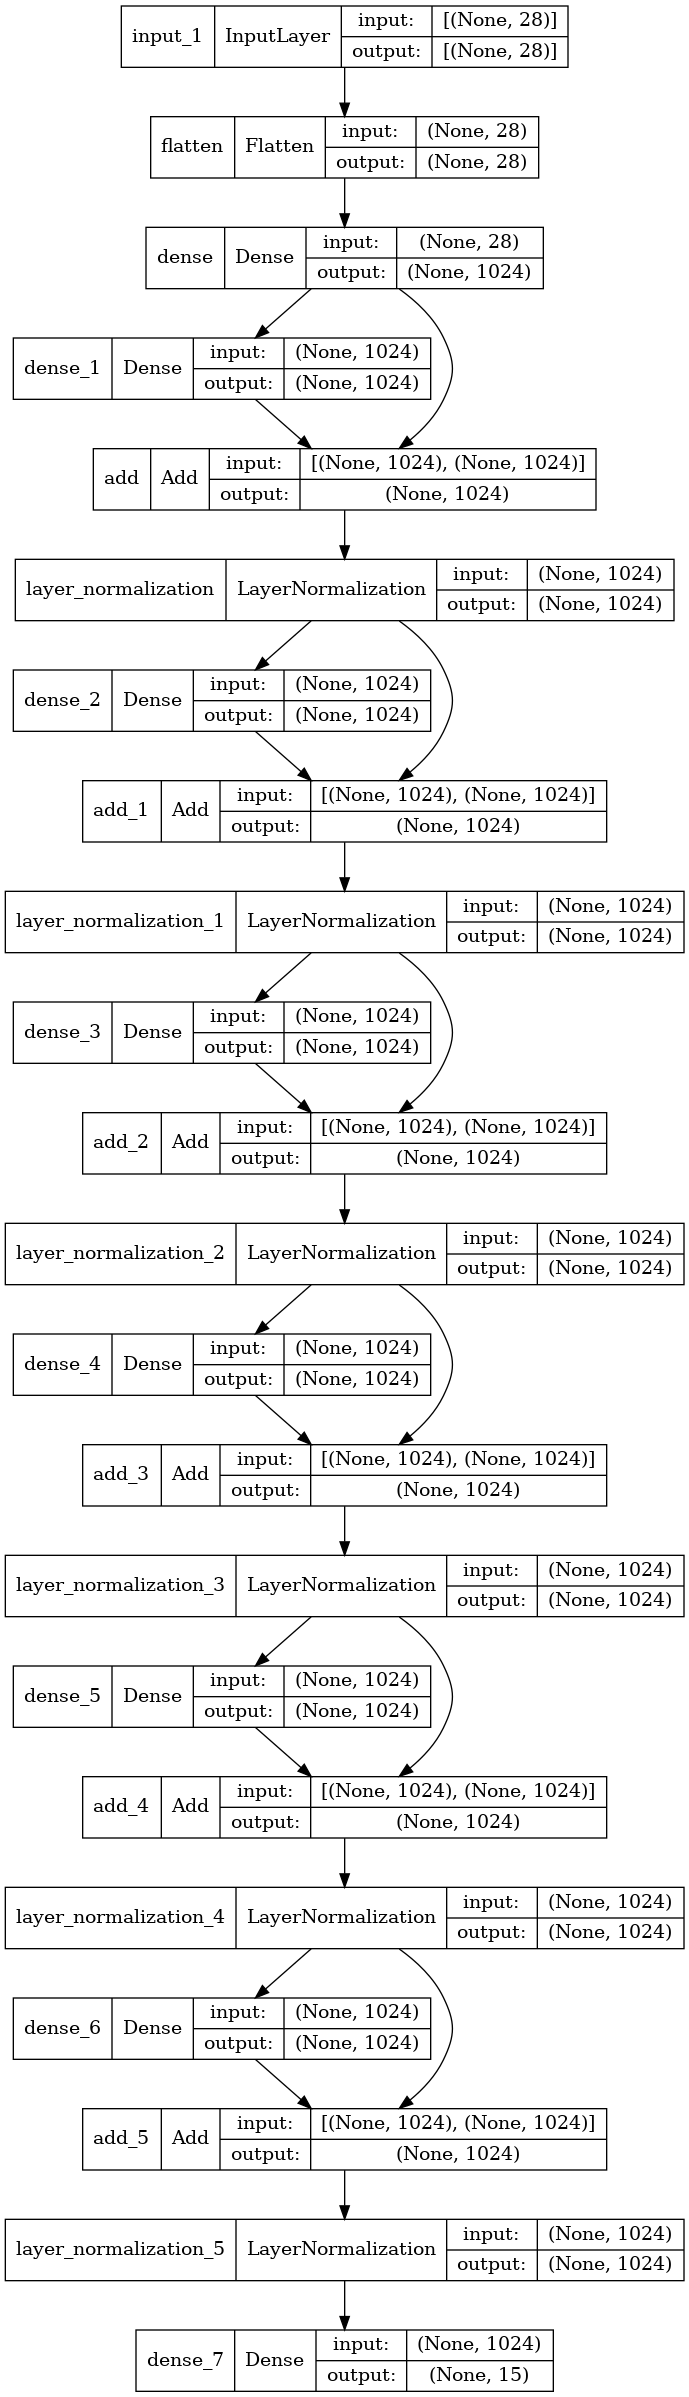

In [16]:
i1 = keras.layers.Input(generator.recipes.shape[1:])
f1 = keras.layers.Flatten()(i1)
y1 = keras.layers.Dense(embed_dim)(f1)

# Stack residual blocks (skip connections)
for i in range(stack):
    y2 = y1
    y1 = keras.layers.Dense(embed_dim,
        activation=keras.activations.relu)(y1)
    y1 = keras.layers.Add()([y1,y2])
    y1 = keras.layers.LayerNormalization()(y1)
    

o1 = keras.layers.Dense(quant.shape[1],activation=keras.activations.softplus)(y1)

# Uncomment these if you wish to make your own model
model = keras.Model(i1,o1)
model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
model.summary()
keras.utils.plot_model(model,show_shapes=True,expand_nested=True)

<font size="5">Model Training</font>

If you uncomment the fit function below and comment the model load function and the plot_model function instead, you can run the model above in real time and graph its progress. You can also then see the plot of how the model trained if you run this live by uncommenting the plt section. However, this process could take quite a long time, as such, a pre-trained model has been prepared.

In [105]:
# Load in pre-made model
model, recipe_normalizer, quant_normalizer = load(model_folder, model_name)

#keras.utils.plot_model(model,to_file='recipe_model.png',show_shapes=True,expand_nested=True)

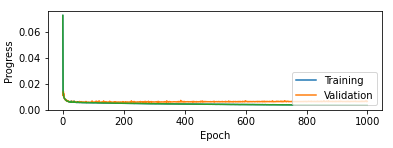

In [106]:
# Comment this out as well when testing your own models
Image("./images/training_graph.png")

<font size="5">Testing Fake Data</font>

Here we create new data to run tests on.

In [39]:
#prediction values
test_gen = Generator('./data/nutrients.csv')
test_gen.generate(test_examples) # generates arg number of examples
if rank:
    test_gen.rank()
    
test_recipes = test_gen.recipes
test_quant = test_gen.quant
    
#normalize
test_recipes = recipe_normalizer.normalize(test_recipes)
test_quant = quant_normalizer.normalize(test_quant)

pred = model.predict(test_recipes)
pred = quant_normalizer.inv_normalize(pred) #inverse normalize
    
actual = test_gen.quant

In [40]:
# Change this value to anything within the amount of 
# test_examples you specified in the parameter block above
testing_index = 0 
# Then rerun this block

ingredientsList =['Active Dry Yeast','Water','Salt','Bread Flour','Butter','Sugar','Egg','Dry Milk',
                  'Whole Wheat Flour','Vegetable Oil','Olive Oil','Honey','Brown Sugar','All-Purpose Flour','Milk']

print(f"Fake Recipe #{testing_index+1}\n")
for i in range(len(actual[0])):
    print(f"{ingredientsList[i].ljust(18)} - predicted: {str(round(pred[testing_index,i],3)).ljust(7)} grams | actual: {str(round(actual[testing_index,i],3)).ljust(6)} grams ")

Fake Recipe #1

Active Dry Yeast   - predicted: 28.957  grams | actual: 32.54  grams 
Water              - predicted: 365.289 grams | actual: 353.536 grams 
Salt               - predicted: 20.506  grams | actual: 21.153 grams 
Bread Flour        - predicted: 129.725 grams | actual: 145.614 grams 
Butter             - predicted: 0.0     grams | actual: 0.0    grams 
Sugar              - predicted: 26.942  grams | actual: 25.714 grams 
Egg                - predicted: 0.001   grams | actual: 0.0    grams 
Dry Milk           - predicted: 0.001   grams | actual: 0.0    grams 
Whole Wheat Flour  - predicted: 0.016   grams | actual: 0.0    grams 
Vegetable Oil      - predicted: 0.002   grams | actual: 0.0    grams 
Olive Oil          - predicted: 12.396  grams | actual: 12.894 grams 
Honey              - predicted: 0.0     grams | actual: 0.0    grams 
Brown Sugar        - predicted: 0.001   grams | actual: 0.0    grams 
All-Purpose Flour  - predicted: 0.013   grams | actual: 0.0    grams 
Mi

<font size="5">Testing Real Data</font>

In [11]:
data = list(csv.reader(open(f"{model_folder}/accuracyPer.csv")))
data = np.array(data)
recipe_quant = "./data/Recipe Data.csv"
ingr_nutr = "./data/nutrients.csv"

realdata = RealData(recipe_quant,ingr_nutr)
if rank:
    realdata.rank()


real_recipes = realdata.recipes
real_quant = realdata.quant

#normalize
real_recipes = recipe_normalizer.normalize(real_recipes)

pred = model.predict(real_recipes)
pred = quant_normalizer.inv_normalize(pred) #inverse normalize
    
actual = realdata.quant

For testing purposes, we have gathered a small list of recipes with the proper amounts of ingredients so we can accurately test our network.
![Nutrient.csv image](images/recipes.png)

In [18]:
# Change this value to an index of a recipe above
testing_index = 8
# Then rerun this block

recipeNames = ['invalid','Traditional White Bread','Country White Bread','Sourdough Starter','French Countryside Bread',
               'Italian Herb Bread','White Bread','100% Whole Wheat Bread','Dough','Bagel dough',
               'Bread Pretzel','Butter Rolls','Pizza Crust']

print(f"Recipe - {recipeNames[testing_index]} - {str(data[testing_index-1,0])}% Accurate\n")

for i in range(len(actual[0])):
    print(f"{ingredientsList[i].ljust(18)} - predicted: {str(round(pred[testing_index-1,i],3)).ljust(7)} grams | actual: {str(round(actual[testing_index-1,i],3)).ljust(6)} grams")

Recipe - Dough - 96.3% Accurate

Active Dry Yeast   - predicted: 2.638   grams | actual: 2.8    grams
Water              - predicted: 379.23  grams | actual: 413.0  grams
Salt               - predicted: 10.215  grams | actual: 11.4   grams
Bread Flour        - predicted: 0.012   grams | actual: 0.0    grams
Butter             - predicted: 0.0     grams | actual: 0.0    grams
Sugar              - predicted: 3.483   grams | actual: 4.2    grams
Egg                - predicted: 0.005   grams | actual: 0.0    grams
Dry Milk           - predicted: 2.638   grams | actual: 2.8    grams
Whole Wheat Flour  - predicted: 0.004   grams | actual: 0.0    grams
Vegetable Oil      - predicted: 29.728  grams | actual: 28.6   grams
Olive Oil          - predicted: 0.0     grams | actual: 0.0    grams
Honey              - predicted: 0.0     grams | actual: 0.0    grams
Brown Sugar        - predicted: 0.0     grams | actual: 0.0    grams
All-Purpose Flour  - predicted: 565.609 grams | actual: 540.0  grams
M

<font size="5">Accuracy</font>

In [286]:
datafile = open(f"{model_folder}/accuracy.csv")
data = list(csv.reader(datafile))
data = np.array(data)

In [287]:
parsed = [""]
count = 0
for arr in data:
    for row in arr:
        for c in row:
            if c.isdigit() or c == '.':
                parsed[count] += c
            else:
                count += 1
                parsed.append("")
                
parsed = list(filter(('').__ne__, parsed))
data = np.array(parsed,dtype=float)
data = data.reshape(-1,17)

### Mean Absolute Percentage Error (MAPE)

## ${\sum^{n}_{t=1} \frac{ | A_t - F_t | }{A_t}} $

In [307]:
index = 6

sp.symbols('Nutrients')

sym_1 = sp.symbols(f"{index}_mape")
sym_2 = sp.symbols(f"{index}_ingr-mape")

In [308]:
sp.Eq(sym_1,sp.Matrix(np.array(data[index,1:2],dtype=float)),evaluate=False)

6ₘₐₚₑ = [97.826]

In [309]:
sp.Eq(sym_2,sp.Matrix(np.array(data[index,2:],dtype=float)),evaluate=False)

              ⎡82.35⎤
              ⎢     ⎥
              ⎢96.03⎥
              ⎢     ⎥
              ⎢93.9 ⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
6_ingr-mape = ⎢100.0⎥
              ⎢     ⎥
              ⎢98.59⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎢96.48⎥
              ⎢     ⎥
              ⎢100.0⎥
              ⎢     ⎥
              ⎣100.0⎦

______________________